# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [285]:
!pip install ucimlrepo

In [286]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [287]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [288]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [289]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
656,84.0,42,76,156,64,7,151,44,19,143,179,339,157,75,0,20,187,193
633,102.0,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
651,85.0,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
739,96.0,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202
325,82.0,44,63,123,54,7,151,45,19,147,166,329,185,81,3,4,179,182
628,98.0,51,84,207,72,7,184,35,21,161,199,520,198,72,9,11,196,199
692,108.0,51,100,206,63,10,196,34,23,159,214,576,201,65,7,16,194,205
595,89.0,50,83,195,65,6,178,37,21,156,207,481,210,71,1,6,189,194
732,85.0,45,73,167,69,8,143,46,18,148,173,307,176,71,2,0,190,199


Methods `describe` and `info` deliver some useful information.

In [290]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,548.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.540146,44.774135,81.989071,167.681239,61.597450,8.562842,167.719490,41.406193,20.566485,147.322404,187.426230,435.204007,174.107468,72.240437,6.522769,12.916211,188.590164,195.648452
std,8.224692,6.658784,15.874389,32.702352,9.024504,4.860665,33.985903,9.432087,2.718154,15.583302,31.213483,176.624551,34.541699,7.386645,5.692703,9.032802,9.374487,7.266706
min,73.000000,33.000000,36.000000,73.000000,47.000000,3.000000,6.000000,26.000000,17.000000,20.000000,127.000000,184.000000,109.000000,60.000000,0.000000,0.000000,19.000000,181.000000
25%,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,136.000000,167.000000,313.000000,147.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,584.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,117.000000,100.000000,110.000000,252.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,288.000000,1018.000000,401.000000,127.000000,72.000000,41.000000,206.000000,211.000000


In [291]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 656 to 272
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       548 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Сначала уберем все пропущенные значения из датасета:

In [292]:
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]
X_train.shape

(548, 18)

Используя метод межквартильного размаха удалим значения выбросов:

In [293]:
for column in X_train.columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3-Q1
    X_train = X_train[(X_train[column] >= Q1 - 1.5 * IQR) & (X_train[column] <= Q3 + 1.5 * IQR)]
X_train

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
656,84.0,42,76,156,64,7,151,44,19,143,179,339,157,75,0,20,187,193
633,102.0,52,101,213,64,10,203,33,23,157,214,616,186,65,0,19,193,203
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
651,85.0,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
739,96.0,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,93.0,46,82,145,58,11,159,43,20,160,180,371,189,77,2,4,183,194
243,101.0,55,108,228,69,12,215,31,24,168,229,684,214,71,2,16,188,199
171,106.0,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183
327,89.0,44,82,136,54,6,149,45,19,144,170,332,168,68,10,14,188,193


In [294]:
X_train.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,93.411654,44.620301,82.045113,167.171053,61.060150,8.146617,167.770677,41.212406,20.511278,147.462406,186.911654,434.109023,173.281955,71.879699,6.236842,12.975564,188.906015,195.667293
std,8.011391,6.207234,15.630920,31.924683,5.725694,2.069673,32.878823,7.844654,2.551515,14.621029,30.474677,173.742898,32.926092,6.107681,4.710480,9.087219,5.892525,7.156327
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,39.000000,70.000000,140.000000,57.000000,7.000000,145.000000,33.000000,19.000000,136.000000,166.750000,313.750000,147.000000,67.000000,2.000000,6.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,165.500000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,176.500000,363.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,98.000000,49.000000,96.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,158.000000,214.000000,579.250000,198.000000,75.000000,9.000000,20.000000,193.000000,201.000000
max,116.000000,59.000000,110.000000,238.000000,76.000000,13.000000,262.000000,61.000000,28.000000,188.000000,288.000000,987.000000,264.000000,87.000000,20.000000,41.000000,204.000000,211.000000


In [295]:
y_train = y_train.loc[X_train.index]

Далее стандартизируем все значения в датасете, а именно вычтем среднее и поделим на среднеквадратичное отклонение. Для этого воспользуемся StandardScaler:

In [296]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Найдем оптимальные значения для гиперпараметров C- регуляризация и penalty:

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
params = {'penalty':['l1', 'l2'], 'C' : np.linspace(0.01, 100, 30)}
grid_srch = GridSearchCV(log_reg, params, scoring='accuracy', cv=5)
grid_srch.fit(X_train_std, np.array(y_train).ravel())
grid_srch.best_estimator_

LogisticRegression(C=3.4579310344827583, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

In [298]:
grid_srch.best_params_

{'C': 3.4579310344827583, 'penalty': 'l1'}

In [299]:
X_test_std = scaler.transform(X_test)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=grid_srch.best_params_['C'], penalty=grid_srch.best_params_['penalty'])
log_reg.fit(X_train_std, np.array(y_train).ravel())
y_pred = log_reg.predict(X_test_std)
print(f1_score(y_pred, y_test, average='weighted'))
print(accuracy_score(y_pred, y_test))

0.7870364275887798
0.7845117845117845


c:\Users\pinma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


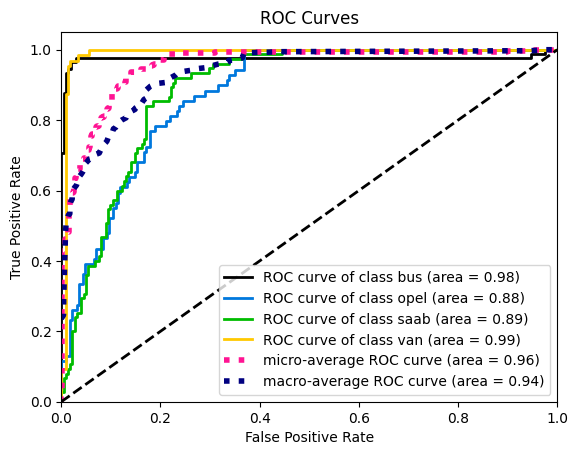

In [300]:
import scikitplot
import matplotlib.pyplot as plt
predicted_proba = log_reg.predict_proba(X_test_std)
scikitplot.metrics.plot_roc_curve(y_test, predicted_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

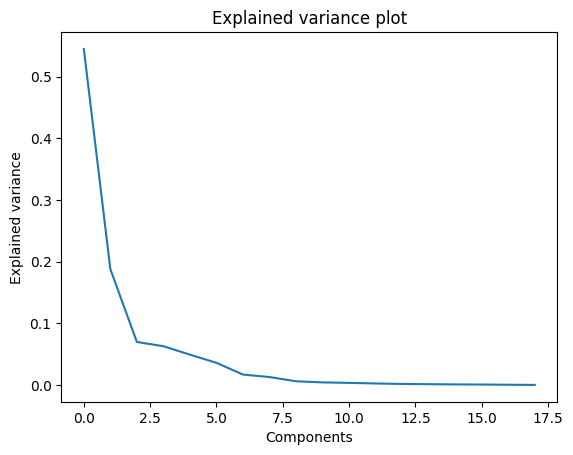

In [301]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.title("Explained variance plot")
plt.xlabel("Components")
plt.ylabel("Explained variance")
plt.show()

Построим еще график куммулятивной дисперсии

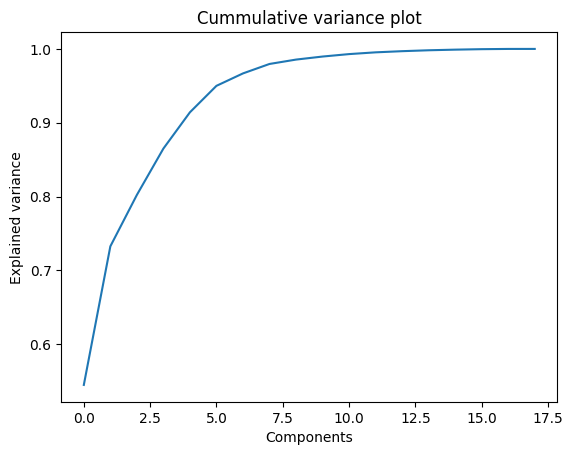

In [302]:
cum_variance = np.cumsum(explained_variance)
plt.plot(cum_variance)
plt.title("Cummulative variance plot")
plt.xlabel("Components")
plt.ylabel("Explained variance")
plt.show()

По графикам видно, что достаточно взять 9 компонент, так как по графику куммулятивной дисперсии видно, что на 9 компонентах вклад в дисперсию уже около 97%.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

В прошлом пункте описано почему мы возьмем 9 компонент. Для PCA важна нормализация данных, так как признаки с большой дисперсией могут иметь низкую предсказательную способность, а признаки с маленькой дисперсией наоборот и тогда, если данные не нормализовывать, то мы будем упорядочивать компоненты по убыванию дисперсий, то есть брать сначала компоненты с низкой предсказательной способностью и из-за этого нам придется взять больше компонент, чем если бы мы нормализовали.

In [303]:
pca = PCA(n_components=9)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [304]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
params = {'penalty':['l1', 'l2'], 'C' : np.linspace(0.01, 100, 30)}
grid_srch = GridSearchCV(log_reg, params, scoring='accuracy', cv=5)
grid_srch.fit(X_train_pca, np.array(y_train).ravel())
grid_srch.best_estimator_

LogisticRegression(C=3.4579310344827583, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

In [305]:
grid_srch.best_params_

{'C': 3.4579310344827583, 'penalty': 'l1'}

In [306]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=grid_srch.best_params_['C'], penalty=grid_srch.best_params_['penalty'])
log_reg.fit(X_train_pca, np.array(y_train).ravel())
y_pred = log_reg.predict(X_test_pca)
print(f1_score(y_pred, y_test, average='weighted'))
print(accuracy_score(y_pred, y_test))

0.7154269598568233
0.7037037037037037


c:\Users\pinma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


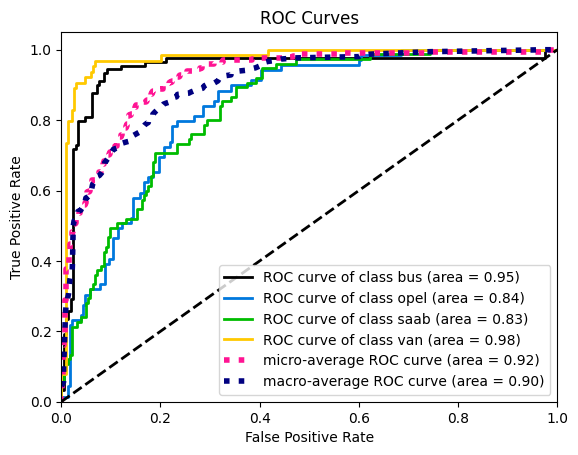

In [307]:
import scikitplot
import matplotlib.pyplot as plt
predicted_proba = log_reg.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc_curve(y_test, predicted_proba)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

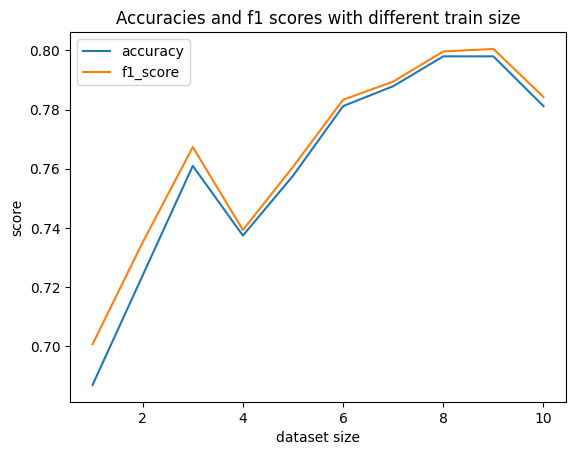

In [309]:
X_train_split = np.array_split(X_train_std, 10)
Y_train_split = np.array_split(np.array(y_train), 10)
accuracies = []
f1_scores = []
log_reg = LogisticRegression()
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=96, penalty='l1')
for i in np.arange(10):
    log_reg.fit(np.concatenate(X_train_split[0:(i+1)]), np.array(np.concatenate(Y_train_split[0:(i+1)]).ravel()))
    y_pred = log_reg.predict(X_test_std)
    accuracies.append(accuracy_score(y_pred, y_test))
    f1_scores.append(f1_score(y_pred, y_test, average='weighted'))
plt.plot(np.arange(1, 11), accuracies, label='accuracy')
plt.plot(np.arange(1,11),f1_scores, label='f1_score')
plt.legend()
plt.xlabel("dataset size")
plt.ylabel("score")
plt.title("Accuracies and f1 scores with different train size")
plt.show()

Видно, что сначала с ростом тренировочной выборки растет accuracy и f1_score и начиная с 5 частей оно перестает расти и находится в окрестности одной и той же точки. Это может говорить о том что модель перестает учится и начинает возможно даже переобучаться. Скорее всего больше 80% сделать на данной модели не получится.